# Промышленность
Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.  
# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

# ПЛАН
1. Открыть и изучить содержимое файлов:
    - импорт библиотек,
    - вывод содержимого на экран
2. Произвести анализ а предобработку данных:
    - проанализировать данные на пропуски, аномальные значения,
    - произвести необходимые для дальнейшей работы расчеты,
    - отобрать необходимые признаки,
3. Подготовить полученные данные для дальнейшего обучения:
    - нормализация данных,
    - разбивка на тренировочную и тестовую выборки
4. Обучение моделей:
    - обучить несколько моделей на тренировочных данных,
    - отобрать лучшую и проверить на тестовой выборке
5. Составить финальный отчет:
    - список признаков(столбцов), используемых для обучения модели,
    - описание прдобработки данных
    - алгоритм обучения, список гиперпараметров модели


# Критерии оценки:
8.7 < МАЕ - неудовлетворительно  
6.8 < МАЕ <= 8.7 - удовлетворительно  
6.0 < МАЕ <= 6.8 - хорошо  
      МАЕ <= 6.0 - отлично

## Открытие и изучение файлов

### Импорт библиотек и загрузка датасетов

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import mean_absolute_error as MAE

In [5]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [6]:
RANDOM_STATE = 250722
SCORING = 'neg_mean_absolute_error'

In [7]:
try:
    df_arc = pd.read_csv('data_arc.csv')
    df_bulk = pd.read_csv('data_bulk.csv')
    df_bulk_time = pd.read_csv('data_bulk_time.csv')
    df_gas = pd.read_csv('data_gas.csv')
    df_temp = pd.read_csv('data_temp.csv')
    df_wire = pd.read_csv('data_wire.csv')
    df_wire_time = pd.read_csv('data_wire_time.csv')
except:
    pass


try:
    df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
except:
    pass

try:
    df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
except:
    pass


try:
    # from google.colab import drive
    # drive.mount('/content/drive')

    df_arc = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_arc.csv')
    df_bulk = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_bulk.csv')
    df_bulk_time = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_bulk_time.csv')
    df_gas = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_gas.csv')
    df_temp = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_temp.csv')
    df_wire = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_wire.csv')
    df_wire_time = pd.read_csv(
        '/content/drive/MyDrive/Colab Notebooks/Яндекс_практикум/выпускной проект/data_wire_time.csv')
except:
    pass


### Данные об электродах

In [8]:
df_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


В датасете дана информация об затраченной электроэнергии во время использования электродов:
- номер электрода,
- время работы,
- активная и реактивная мощности

In [9]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


В датасете отсутствуют пропуски. Переведем тип значений столбцов `Начало нагрева дугой` и `Конец нагрева дугой` в тип pd.datetime

In [10]:
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'])
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'])
df_arc.dtypes

key                              int64
Начало нагрева дугой    datetime64[ns]
Конец нагрева дугой     datetime64[ns]
Активная мощность              float64
Реактивная мощность            float64
dtype: object

### Данные о подаче и времени подачи  сыпучих материалов

In [11]:
df_bulk.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [12]:
df_bulk_time.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


In [76]:
df_bulk_time[df_bulk_time.columns[1:]] = df_bulk_time[df_bulk_time.columns[1:]].apply(pd.to_datetime)

Датасет представлен информацией содежащей:
- объем легирующих компонентов,
- время их загрузки в сплав.

In [14]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [15]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


Проверим соответсвуют ли пропуски одного датасета другому, т.е. если не произошло загрузки легирующего компонента, то в датасете `df_bulk_time` пропуск окажется на той же позиции, что и в `df_bulk`

In [16]:
(df_bulk.isna() != df_bulk_time.isna()).sum().sum()

0

### Данные о продувке сплава газом

In [17]:
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Здесь находится информация о затраченом инертном газе

In [18]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


В данном датасете отсутсвуют пропуски

###  Результаты измерения температуры

In [19]:
df_temp.head(20)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


В датасете присутсует информация о замере температуры сплава на каждом этапе отбора проб и легирования.

In [20]:
df_temp[df_temp.columns[1]] = df_temp[df_temp.columns[1]].apply(pd.to_datetime)

In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Отсутсвуют замеры в некоторых пробах

### Данные о объеме и времени подачи проволочных материалов

In [22]:
df_wire.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_wire_time[df_wire_time.columns[1:]] = df_wire_time[df_wire_time.columns[1:]].apply(pd.to_datetime)

In [24]:
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [25]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [26]:
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [27]:
(df_wire.isna() != df_wire_time.isna()).sum().sum()

0

Данные описывают объем и время подачу легированной проволоки.

### ВЫВОД
Файлы открыты и проанализированы

## Анализ и предобработка данных

### Температура

В таблице имются пропуски в хамерах.

In [29]:
df_temp.dropna(inplace=True)
df_temp.isna().sum()

key             0
Время замера    0
Температура     0
dtype: int64

Рассмотрим распределение температур

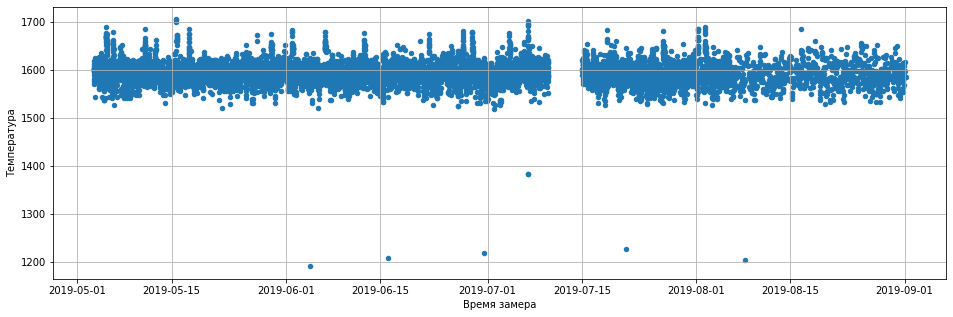

In [30]:
df_temp.plot(
    kind='scatter',
    x='Время замера',
    y='Температура',
    figsize=(16, 5),
    grid=True
);

Имеются выбросы в замерах, которые могут негативно сказаться на обучении модели. На данном этапе оставим их: по заверению заказчика эти данные корректны.

Т.К.  начальная температура - признак, а конечная - целевой признак, то логично предположить, что присутвие всего одного замера в партии ничего не даст для модели. Должно быть как минимум два наблюдения. Удалим партии с единственным замером

In [31]:
# ключи с более одним замером
key_lst = (
    df_temp.groupby('key')['key'].count()
)[
    (df_temp.groupby('key')['key'].count()) > 1].index

# чистим датасет
df_temp = df_temp[df_temp['key'].isin(key_lst)]

Выделим признаки и целевые признаки. Признаки:
- начальная тепература,
- время между первым и последним замером  

Целевой признак:
- конечная тепература

In [32]:
# агригирующие функции
agg_dict = {
    'Время замера': ['min', 'max']
}

# группировка по ключу
df_temp2 = df_temp.groupby('key').agg(agg_dict).set_axis(
    ['Время начального замера', 'Время конечного замера'], axis=1).reset_index()

# соединение нужных столбцов
df_temp2 = (
    df_temp2
    .merge(df_temp[['Время замера', 'Температура']], how='left', left_on='Время начального замера', right_on='Время замера')
    .merge(df_temp[['Время замера', 'Температура']], how='left', left_on='Время конечного замера', right_on='Время замера')
).drop(['Время замера_x', 'Время замера_y'], axis=1).rename({
    'Температура_x': 'Начальная температура',
    'Температура_y': 'Конечная температура'
}, axis=1)

# расчет времени между перым замером и последним
df_temp2['Время замеров'] = (df_temp2['Время конечного замера'] -
                             df_temp2['Время начального замера']).apply(lambda x: x.seconds)

print(df_temp2.shape)
df_temp2.head()

(2475, 6)


,key,Время начального замера,Время конечного замера,Начальная температура,Конечная температура,Время замеров
0,1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0,861
1,2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0,1305
2,3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0,1300
3,4,2019-05-03 12:52:57,2019-05-03 12:59:25,1601.0,1625.0,388
4,5,2019-05-03 13:23:19,2019-05-03 13:36:01,1576.0,1602.0,762


Типичных техпроцесс, судя по описанию и данным, состоит из шагов:
1. нагреть сплав
2. измерить температуру
3. повторить до нужного значения

Очевидно, если время замера температуры будет меньше времени остановки нагрева электродом, то данная партия будет считаться аномальной(выбивающейся из техпроцесса)

In [33]:
# присоединяем таблицу с электродами
df_temp2 =  (
    df_temp2
    .merge( df_arc.groupby('key')['Конец нагрева дугой'].max().reset_index(),
    how='left')
            )

In [34]:
# аномальные партии
key_lst = df_temp2[(df_temp2['Время конечного замера'] < df_temp2['Конец нагрева дугой'])].index
key_lst

Int64Index([  10,   37,   40,   48,   61,   66,   70,   78,  174,  176,
            ...
            2280, 2283, 2367, 2368, 2371, 2376, 2403, 2405, 2428, 2434],
           dtype='int64', length=131)

In [35]:
# чистим датасет
df_temp2 = df_temp2.loc[~df_temp2['key'].isin(key_lst)]

# оставляем нужные столбцы
df_temp2 = df_temp2[[ 'key', 'Начальная температура', 'Конечная температура', 'Время замеров']]

# меняем тип данных
df_temp2 = df_temp2.astype({
    'Начальная температура': int,
    'Конечная температура': int
})

df_temp2

,key,Начальная температура,Конечная температура,Время замеров
0,1,1571,1613,861
1,2,1581,1602,1305
2,3,1596,1599,1300
3,4,1601,1625,388
4,5,1576,1602,762
...,...,...,...,...
2470,2495,1570,1591,1137
2471,2496,1554,1591,1618
2472,2497,1571,1589,717
2473,2498,1591,1594,1302


Рассмотрим распределение температур

,mean,std,min,25%,50%,75%,max
Начальная температура,1588.45,29.49,1191.0,1571.0,1588.0,1606.0,1679.0
Конечная температура,1595.35,15.91,1541.0,1587.0,1593.0,1599.0,1700.0


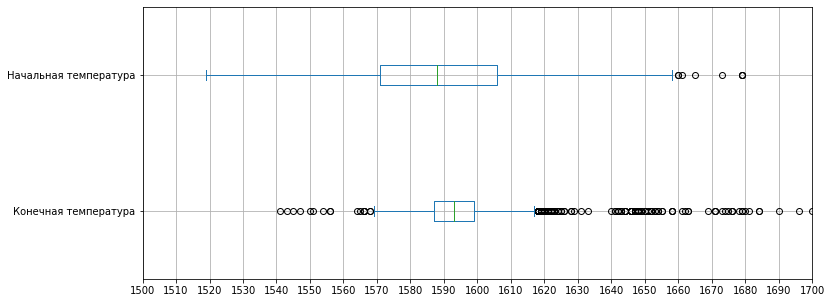

In [36]:
lim = (1500, 1700, 10)
ticks = np.arange(lim[0], lim[1]+lim[2], lim[2])
xlim = (lim[0], lim[1])

df_temp2[[
    'Конечная температура',
    'Начальная температура']].plot(
        kind='box',
        vert=False,
        grid=True,
        figsize=(12, 5),
        xticks=ticks,
        xlim=xlim,
        # backend='plotly'
);

df_temp2.describe().round(2).T.iloc[1:3, 1:]

#### Вывод
* произведен анализ измерямых температур,
* выделены признаки и целевой признак

### Легирующие материалы

Добавление легирующих добавок определенно скажется на коэфициенте плавления стали.  Рассмотрим процесс легирования. 

In [37]:
len(set(df_wire['key']) ^ set(df_bulk['key']))

160

Как можно убедиться, существуют партии, в которых нет информации об одновременной добавке проволоки и компонентов из сыпучего материала. Предположим, что замеры в данных партиях выбиваются из общей картины техпроцесса.

In [38]:
df_doping = df_bulk.merge(
    df_wire,
    on='key',
    how='inner'
)
print(df_doping.shape)
df_doping.head(10)


(3025, 25)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,...,154.0,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,...,154.0,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,...,153.0,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,...,154.0,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,152.0,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,...,154.0,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,...,154.0,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,...,153.0,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,...,203.0,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.0,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Рассмотрим внимательно пропуски в данных

In [39]:
na_col = round(df_doping.isna().sum() / len(df_doping)
               * 100, 2).sort_values(ascending=False)
na_col


Wire 5     99.97
Bulk 8     99.97
Wire 7     99.64
Wire 4     99.54
Bulk 13    99.40
Bulk 9     99.37
Wire 8     99.37
Bulk 2     99.27
Bulk 7     99.21
Wire 9     99.17
Wire 3     97.92
Wire 6     97.59
Bulk 5     97.45
Bulk 10    94.18
Bulk 11    94.15
Bulk 1     91.67
Bulk 6     81.09
Bulk 4     66.51
Wire 2     65.26
Bulk 3     57.26
Bulk 15    26.08
Bulk 12    22.05
Bulk 14    10.38
Wire 1      0.83
key         0.00
dtype: float64

Присутсвуют столбцы с большим количеством пропусков в данных. Данные столбцы можно смело удалить.  
Примем, что пропуск в добавке будет означать отсутсвие этой добавки по факту. Заменим пропуски на `0`

In [40]:
# Удаляем столбцы с самым высоким количеством пропусков
try:
    na_col = na_col[na_col > 95].index
    df_doping.drop(columns=na_col, inplace=True)
except:
    pass

# заменяем пропуски на 0
df_doping.fillna(0, inplace=True)

print(df_doping.shape)
df_doping.head(10)


(3025, 12)


,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,60.059998,0.000000
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,96.052315,0.000000
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,91.160157,0.000000
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,89.063515,0.000000
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,89.238236,9.114560
5,6,0.0,0.0,117.0,0.0,0.0,0.0,204.0,201.0,154.0,99.109917,9.114560
6,7,0.0,0.0,117.0,0.0,0.0,0.0,204.0,152.0,154.0,98.061600,0.000000
7,8,0.0,0.0,99.0,0.0,0.0,0.0,410.0,252.0,153.0,155.282394,0.000000
8,9,0.0,0.0,117.0,0.0,0.0,0.0,107.0,99.0,203.0,113.393279,9.143681
9,10,0.0,0.0,0.0,0.0,0.0,0.0,203.0,102.0,204.0,81.244796,12.376000


Рассмотрим подробнее добавки

In [41]:
# доля добавок в %
round(
    (
        df_doping.sum()[1:].sort_values(ascending=False) /
        df_doping.sum()[1:].sum()
    ) * 100, 2)


Bulk 12    28.57
Bulk 14    21.51
Bulk 15    16.68
Wire 1     14.10
Bulk 3      6.84
Bulk 4      4.91
Bulk 6      3.16
Wire 2      2.46
Bulk 10     0.68
Bulk 11     0.63
Bulk 1      0.46
dtype: float64

,mean,std,min,25%,50%,75%,max
Bulk 1,3.27,12.06,0.0,0.00,0.00,0.00,185.00
Bulk 3,48.67,74.93,0.0,0.00,0.00,82.00,454.00
Bulk 4,34.96,56.62,0.0,0.00,0.00,72.00,281.00
Bulk 6,22.50,56.18,0.0,0.00,0.00,0.00,503.00
Bulk 10,4.85,20.48,0.0,0.00,0.00,0.00,159.00
Bulk 11,4.49,23.07,0.0,0.00,0.00,0.00,313.00
Bulk 12,203.26,152.23,0.0,105.00,206.00,263.00,1849.00
Bulk 14,153.03,80.88,0.0,104.00,148.00,202.00,636.00
Bulk 15,118.69,83.39,0.0,0.00,106.00,204.00,405.00
Wire 1,100.30,42.73,0.0,71.37,100.15,125.80,330.31


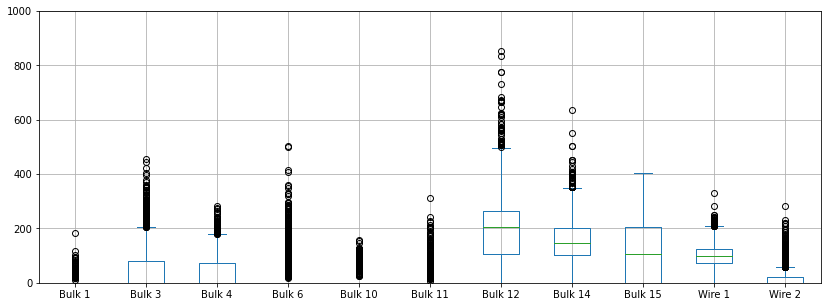

In [42]:
df_doping.iloc[:, 1:].plot(
    kind='box',
    figsize=(14, 5),
    ylim=(0, 1000),
    grid=True,
    # backend='plotly'
)
df_doping.describe().round(2).T.iloc[1:,1:]

#### Вывод
Произведена обработка и подготовка признаков:
- удалены столбцы добавок, которые редко использовались

### Электроды

Рассмотрим распределения мощностей при работе электрода

In [43]:
df_arc.describe().round(2).T.iloc[1:,1:]

,mean,std,min,25%,50%,75%,max
Активная мощность,0.67,0.41,0.03,0.40,0.56,0.86,3.73
Реактивная мощность,0.45,5.88,-715.50,0.29,0.42,0.64,2.68


Присутсвует аномальное значение мощности в -715,5. Рассмотрим другие таблицы с индексом в котором произошла аномалия

In [44]:
df_arc[df_arc['Реактивная мощность'] < -700]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


Это партия с номером 2116. Рассмотрим, что происходило с этой партией в таблицах температур, продувки газа, легирования

In [45]:
df_temp[df_temp['key'] == 2116]

,key,Время замера,Температура
10462,2116,2019-07-24 00:32:59,1579.0
10463,2116,2019-07-24 00:44:34,1574.0
10464,2116,2019-07-24 00:50:58,1578.0
10465,2116,2019-07-24 00:53:31,1578.0


In [46]:
df_gas[df_gas['key'] == 2116]

,key,Газ 1
2113,2116,11.582547


In [47]:
df_doping[df_doping['key'] == 2116]

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2
1984,2116,0.0,0.0,0.0,137.0,0.0,0.0,0.0,198.0,0.0,75.216965,0.0


Ничего необычного не замечено. Скорее всего сбой в датчике или работе плавильного оборудования. Удалим это значение

In [48]:
try:
    df_arc = df_arc.drop([9780])
except:
    pass
# проверка
df_arc[df_arc['key'] == 2116]


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


Добавим столбец `время нагрева`, расчитаем соотношение активной и реактивной мощности

In [49]:
df_arc['Время нагрева'] = df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']

df_arc['Время нагрева'] = df_arc['Время нагрева'].apply(lambda x: x.seconds)

df_arc['Мощность'] = df_arc['Активная мощность'] / df_arc['Реактивная мощность']

df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Время нагрева,Мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148,1.671717


Сгруппируем данные по ключу

In [50]:
# группировка по ключу
df_arc2 = df_arc.groupby('key').agg({
    # Общая активная мощность
    'Активная мощность': 'sum',

    # Общая реактивная мощность
    'Реактивная мощность': 'sum',

    # среднее соотношение мощностей
    'Мощность': 'mean',

    # суммарное время нагрева и колличество включений электродов
    'Время нагрева': ['sum', 'count'],

}).reset_index()

# убераем второй уровень мультииндекса
df_arc2.columns = df_arc2.columns.droplevel(1)

# заменяем название столбца
df_arc2.columns.values[-1] = 'Колво нагревов'

df_arc2.head()


,key,Активная мощность,Реактивная мощность,Мощность,Время нагрева,Колво нагревов
0,1,4.878147,3.183241,1.538898,1098,5
1,2,3.052598,1.998112,1.551834,811,4
2,3,2.525882,1.599076,1.583120,655,5
3,4,3.209250,2.060298,1.563487,741,4
4,5,3.347173,2.252643,1.480428,869,4


,mean,std,min,25%,50%,75%,max
Активная мощность,3.10,1.40,0.19,2.13,2.99,3.90,17.50
Реактивная мощность,2.32,1.05,0.16,1.60,2.23,2.90,12.59
Мощность,1.36,0.13,0.68,1.29,1.37,1.44,1.78
Время нагрева,794.55,332.49,57.00,571.00,770.00,983.00,4189.00
Колво нагревов,4.63,1.61,1.00,4.00,4.00,6.00,16.00


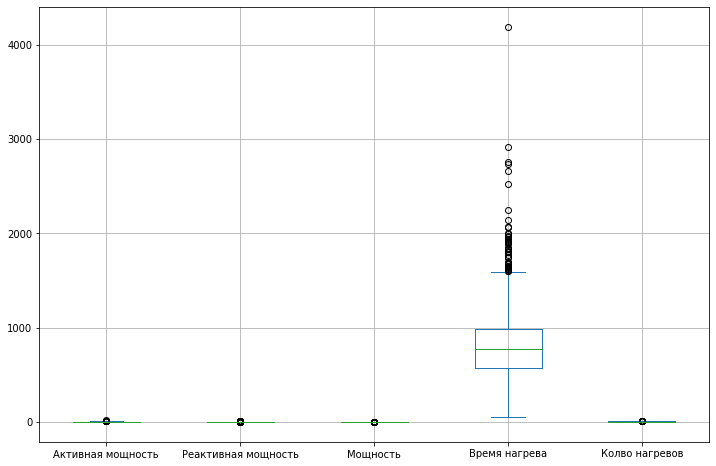

In [51]:
df_arc2.iloc[:,1:].plot(
    kind='box',
    figsize=(12,8),
    grid=True,
);

df_arc2.describe().round(2).T.iloc[1:, 1:]

Судя по диаграмме, значения мощностей находятся в определенном промежутке и редко выбиваются из своих нормальных значений

#### Вывод
- произведен анализ таблицы работ электродов,
- произведен расчет дополнительных параметров

### Продувка газом

Продувка, используемая для устранения химической неоднородности, охлаждает сплав. Этот признак будет использован для обучения моделей.  
Рассмотрим распределение объемов продувки газом

,mean,std,min,25%,50%,75%,max
Газ 1,11.0,6.22,0.01,7.04,9.84,13.77,78.0


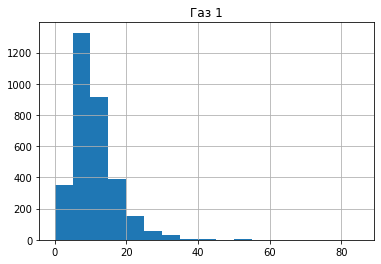

In [52]:
df_gas.hist('Газ 1', bins=np.arange(0, 90, 5))
df_gas.describe().round(2).T.iloc[1:, 1:]

Имеются выбросы. Рассмотрим, что они означают. По таблице замеров температуры, найдем время продувки. Будем считать что продувка осуществляется с момента первого и до момента последнего измерения температуры.

In [53]:
df_gas[df_gas['Газ 1'] > 50]

,key,Газ 1
116,117,50.581035
277,280,60.935689
319,322,77.995040
2107,2110,52.142373
2567,2570,51.380229


In [54]:
(
    df_temp[df_temp['key'] == 117]['Время замера'].iloc[-1]
    - df_temp[df_temp['key'] == 117]['Время замера'].iloc[0]
).seconds/60


53.06666666666667

In [55]:
(
    df_temp[df_temp['key'] == 280]['Время замера'].iloc[-1]
    - df_temp[df_temp['key'] == 280]['Время замера'].iloc[0]
).seconds/60


47.78333333333333

In [56]:
(
    df_temp[df_temp['key'] == 322]['Время замера'].iloc[-1]
    - df_temp[df_temp['key'] == 322]['Время замера'].iloc[0]
).seconds/60


112.08333333333333

In [57]:
(
    df_temp[df_temp['key'] == 1]['Время замера'].iloc[-1]
    - df_temp[df_temp['key'] == 1]['Время замера'].iloc[0]
).seconds/60


14.35

Время продувки на некоторых партиях больше, чем в первой партии. Рассмотрим процесс легирования в данных партиях. 

In [58]:
df_doping[df_doping['key'].isin([
    1, 2, 3, 4, 5, 115, 400,  # выборочные партии
    117, 280, 322
])].sum(axis=1)


0       614.059998
1       680.052315
2       638.160157
3       688.063515
4       687.352796
96      281.000000
98      237.000000
251    1013.410723
292    3339.228550
359    1240.375992
dtype: float64

Как мы можем наблюдать, в данных партиях было загружено намного больше легирующих компонентов. Следовательно, объем продувки будет тоже выше.

#### Вывод
Произведен анализ таблицы продувки инертным газом

### Объединение таблиц

Объединим таблицы, полученные в ходе обработки и замены данных

In [59]:
df_final = (
    df_temp2.merge(df_arc2, on='key', how='left')  # температура + электрод
    .merge(df_gas, on='key', how='left')  # + газ
    .merge(df_doping, on='key', how='left')  # + легирование
)

# переместим столбец `key` в индексы
df_final.set_index('key', inplace=True)

# удалим полученные пропуски
df_final.dropna(inplace=True)

print('Кол-во пропусков:', df_final.isna().sum().sum())

print(df_final.shape)
df_final.head(10)


Кол-во пропусков: 0
(2207, 20)


,Начальная температура,Конечная температура,Время замеров,Активная мощность,Реактивная мощность,Мощность,Время нагрева,Колво нагревов,Газ 1,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2
key,,,,,,,,,,,,,,,,,,,,
1,1571,1613,861,4.878147,3.183241,1.538898,1098,5,29.749986,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,60.059998,0.000000
2,1581,1602,1305,3.052598,1.998112,1.551834,811,4,12.555561,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,96.052315,0.000000
3,1596,1599,1300,2.525882,1.599076,1.583120,655,5,28.554793,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,91.160157,0.000000
4,1601,1625,388,3.209250,2.060298,1.563487,741,4,18.841219,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,89.063515,0.000000
5,1576,1602,762,3.347173,2.252643,1.480428,869,4,5.413692,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,89.238236,9.114560
6,1543,1596,1385,3.955108,2.689175,1.501854,952,4,11.273392,0.0,0.0,117.0,0.0,0.0,0.0,204.0,201.0,154.0,99.109917,9.114560
7,1586,1599,1374,2.547375,1.561295,1.628748,673,4,9.836267,0.0,0.0,117.0,0.0,0.0,0.0,204.0,152.0,154.0,98.061600,0.000000
8,1577,1598,934,3.762755,2.680698,1.486391,913,4,15.171553,0.0,0.0,99.0,0.0,0.0,0.0,410.0,252.0,153.0,155.282394,0.000000
9,1587,1592,1453,2.081951,1.478671,1.421598,625,5,8.216623,0.0,0.0,117.0,0.0,0.0,0.0,107.0,99.0,203.0,113.393279,9.143681


In [60]:
df_final.describe().round(2).T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
Начальная температура,1586.83,28.65,1191.00,1571.00,1587.00,1603.00,1660.00
Конечная температура,1593.41,11.16,1541.00,1587.00,1593.00,1598.00,1653.00
Время замеров,1900.63,1342.56,234.00,1212.00,1634.00,2289.50,23537.00
Активная мощность,3.14,1.43,0.19,2.16,3.02,3.91,17.50
Реактивная мощность,2.35,1.09,0.16,1.62,2.23,2.91,12.59
Мощность,1.36,0.13,0.69,1.29,1.37,1.44,1.78
Время нагрева,805.65,343.37,57.00,577.00,776.00,992.00,4189.00
Колво нагревов,4.68,1.62,1.00,4.00,5.00,6.00,16.00
Газ 1,11.35,6.39,0.01,7.29,10.09,14.17,78.00
Bulk 1,3.52,12.59,0.00,0.00,0.00,0.00,185.00


Перепроверим корреляцию признаков

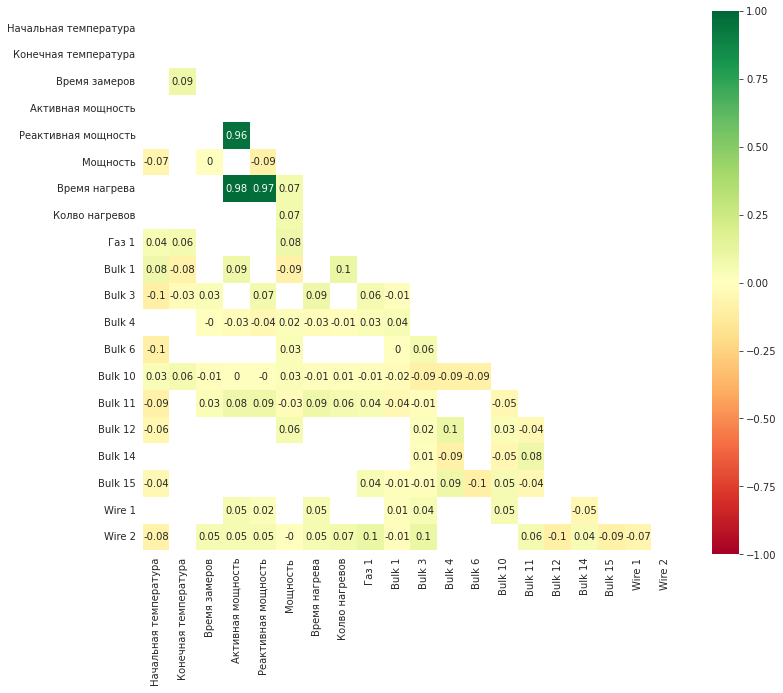

In [61]:
corr = df_final.corr().round(2)

corr = corr[(abs(corr) >= 0.9) | (abs(corr) <= 0.1)]

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1,
                     square=True, annot=True, cmap='RdYlGn')


Сильная корреляция между активной, реактивной мощностями и временем нагрева. На данном этапе оставим их.

### ВЫВОД
- данные проанализированы,
- признаки отобраны и собраны в единую таблицу

## Подготовка признаков

Разделим полученный датафрейм на таблицы признаков и целевого признака

In [62]:
y = df_final['Конечная температура']
X = df_final.drop(columns=['Конечная температура'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE)
# проверка
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1655, 19) (1655,)
(552, 19) (552,)


Получим обучающие и тестовые выборки

### ВЫВОД
- созданы выборки для обучения моделей

## Обучение моделей

Обучим модели:
- линейной регрессии,
- случайного леса,
- градиентного бустинга

In [63]:
df_score = pd.DataFrame(
    columns=['кросс-валидация'],
    index=['CatBoost', 'RandomForestRegressor', 'LinearRegression']
)
df_score


,кросс-валидация
CatBoost,NaN
RandomForestRegressor,NaN
LinearRegression,NaN


### Модели

#### CatBoost

In [64]:
model_cat = CatBoostRegressor(
    random_state=RANDOM_STATE,
    loss_function='MAE',
    eval_metric='MAE',
    verbose=False
)

In [65]:
model_cat = CatBoostRegressor(
    verbose=False, random_state=RANDOM_STATE, loss_function='MAE', eval_metric='MAE')

score_val_cat = -cross_val_score(
    model_cat,
    X_train, y_train,
    cv=5,
    scoring=SCORING
).mean().round(3)

df_score.iloc[0, 0] = score_val_cat


#### Случайный лес

In [66]:
# обьявление модели
model_rf = RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE)

# сетка перебираемых параметров
parametr = {
    'max_depth'     :   np.arange(22, 25, 10),
    'n_estimators'  :   np.arange(600,605, 10)
}

# перебор параметров на кросс-валидации
grid_search = GridSearchCV(
    model_rf,
    parametr,
    cv=5,
    n_jobs=-1,
    scoring=SCORING
)

grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print(-round(grid_search.best_score_, 3))

df_score.iloc[1, 0] = -round(grid_search.best_score_, 3)


{'max_depth': 22, 'n_estimators': 600}
5.903


In [67]:
model_rf = grid_search.best_estimator_

#### Линейная регрессия

Для последующих моделей произведем масштабирование признаков.

In [68]:
# масштабирование признаков обучающей выборки
scaler = StandardScaler()

# обучаем стандартизатор на обучающей выборке
scaler.fit(X_train)
# =======================================================
# применяем пправила к выборке
X_train = scaler.transform(X_train)

# масштабирование признаков тестовой выборки
X_test = scaler.transform(X_test)

X_train[0]


array([-1.01727039, -0.791526  ,  0.41851371,  0.1610635 ,  0.99173153,
       -0.04504956, -0.42418914,  0.43651894,  3.26099989,  3.23887709,
       -0.63347252,  0.58506733, -0.23473806, -0.18019374,  0.28787026,
       -0.04323858, -0.1750876 , -1.00492368,  0.66187897])

Получим оценку качества модели линейной регрессии на кроссвалидации

In [69]:
# объявление модели
model_lr = LinearRegression(n_jobs=-1)

In [70]:
# оценка на кросс-валидации
df_score.iloc[2, 0] = round(
    -cross_val_score(model_lr, X_train, y_train,
                     scoring=SCORING, cv=5, n_jobs=-1).mean(), 3
)

### Тестирование модели

In [71]:
df_score

,кросс-валидация
CatBoost,5.753
RandomForestRegressor,5.903
LinearRegression,5.734


Лучшей моделью является модель CatBoost. Протестируем ее на тестовых данных. Заново создадим выборки

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=RANDOM_STATE)
# проверка
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1655, 19) (1655,)
(552, 19) (552,)


Подберем гиперпараметры

In [73]:
# сетка перебираемых параметров
parametr = {
    'loss_function': ['RMSE', 'MAE'],
    'depth': [1, 2, 3, 4],

}

# перебор параметров на кросс-валидации
grid_search = GridSearchCV(
    model_cat,
    parametr,
    cv=5,
    n_jobs=-1,
    scoring=SCORING
)

grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print(-round(grid_search.best_score_, 3))

{'depth': 4, 'loss_function': 'RMSE'}
5.518


In [74]:
model_cat = grid_search.best_estimator_

In [75]:
model_cat.fit(X_train, y_train)
predict = model_cat.predict(X_test)

round(MAE(y_test, predict), 3)

5.301

### ВЫВОД
Значение МАЕ = 5.3. Это означает, что средняя абсолютная погрешность в предсказании температуры составляет 5.3 градуса. Для таких высоких температур, данная погрешность не является критичной и удовлетворяет требованиям заказчика

## ОТЧЕТ
Цель проекта: построение модели, предсказывающая температуру стали - **достигнута**.<br>
Во время выполнения задания все намеченные пункты плана были **выполнены**.<br>
Трудности возникли на этапе исследовательского анализа данных и предобработки. Для последующих шагов извлекали необходимые признаки. Целевого признака, как такого в таблицах не было: пришлось проводить его извлечение из данных, а также рассчитывать и вводить новые признаки.<br>
Такая предобработка позволила добиться необходимого значения метрики MAE.

Во время выполнения проекта, была проделаны следующие шаги:  
1. подготовка данных:
    - прочитали и изучили данные.<br><br>

2. Анализ данных и предобработка данных:  
    * провели предобработку данных в таблице замеров температур:<br>
        - убрали партии, в которых был один замер,
        - написали цикл, собирающий в замерах партий первый и последний замер
        Данные вынесены в отдельный датафрейм
    * провели предобработку данных в таблице легирующих элементов:<br>
        - объединили таблицы с данными о легирующих добавках(датафреймы df_data_bulk и df_data_wire) методом pd.merge(how='inner'),
        - удалили столбцы с большим количестом пропусков. Удаленные столбцы: 
'Wire 5', 'Bulk 8', 'Wire 7', 'Wire 4', 'Bulk 13', 'Bulk 9', 'Wire 8', 'Bulk 2', 'Bulk 7', 'Wire 9', 'Wire 3', 'Wire 6', 'Bulk 5'.
        - исходя из предположения, что пропуски - это отсутствие легирующей добавки: заменили их в полученной таблице на 0. 
    * провели предобработку данных в таблице с информацией о работе электродов:
        - удалили выброс в столбце 'Реактивная мощность'(отрицательная мощность, key=2116),
        - по каждой партии расчитали: относительную мощность, количество запусков электродов, общее время подогрева,
    * Объединили таблицы: полученную таблицу температур, электродов, продувки газа, объединенную таблицу легирующих добавок. Получилась таблица со столбцами:
        - 'Начальная температура',
        - 'Конечная температура',
        - 'Время замеров',
        - 'Активная мощность',
        - 'Реактивная мощность',
        - 'Мощность',
        - 'Время нагрева',
        - 'Колво нагревов',
        - 'Газ 1',
        - 'Bulk 1',
        - 'Bulk 3',
        - 'Bulk 4',
        - 'Bulk 6',
        - 'Bulk 10',
        - 'Bulk 11',
        - 'Bulk 12',
        - 'Bulk 14',
        - 'Bulk 15',
        - 'Wire 1',
        - 'Wire 2'<br><br>

3. Подготовили полученные данные для дальнейшего обучения: разбили на обучающую и тренировочные выборки в соотношении 3:1.<br><br>

4. Обучили модели случайного леса, линейной регрессии и градиентного спуска на полученных выборках.<br><br>

5. Лучшую модель(CatBoostRegressor) проверили на тестовой выборке. Модель отлично работает с установленными параметрами по умолчанию. В качестве функций  были прописаны функция потерь loss_function='RMSE и переобучения eval_metric='MAE'. Метрика МАЕ=5.3<br>

```
CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='MAE',
    depth=4
    verbose=False
    )
```

